# Spot A Difference? -- Statistics 101 for Business Decision-Makers

In [170]:
# Import required libraries
import os
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlarena.utils.plot_utils import plot_box_scatter
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

# Configure plotting
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
MPL_BLUE = colors[0]  
MPL_RED = colors[3]  
MPL_YELLOW = colors[1]  
MPL_GREEN = colors[2]  
colors = [MPL_BLUE, MPL_RED]

# Configure parallel processing
# Only needed when running locally (not required on distributed platforms like Databricks)
n_cores = multiprocessing.cpu_count()
n_jobs = max(1, n_cores // 2)  # Use half of available cores to avoid overloading
os.environ["LOKY_MAX_CPU_COUNT"] = str(n_jobs)

# A Mean Difference Discovered

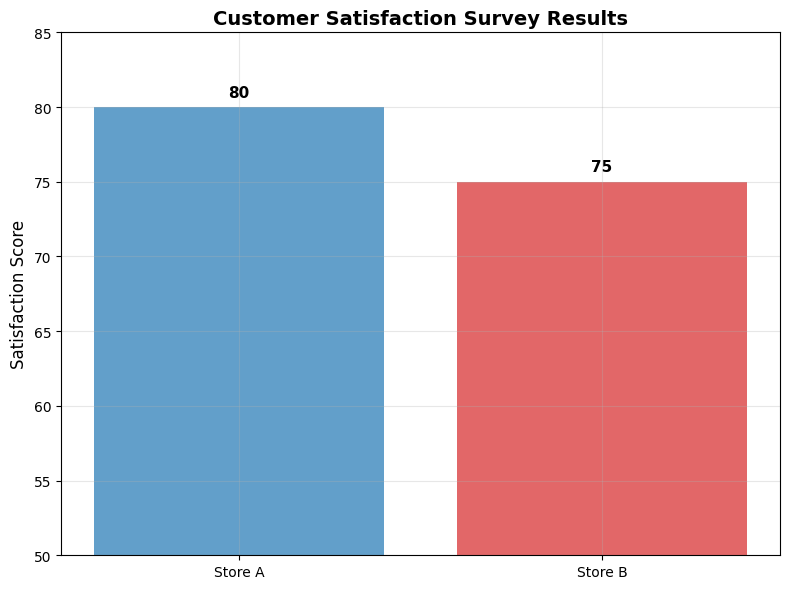

📊 Typical executive presentation: Store A appears to outperform Store B.
💭 Initial reaction: 'Store B clearly needs intervention'
⚠️  But wait... this chart only shows averages. What's the full story?


In [171]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
teams = ['Store A', 'Store B']
satisfaction_means = [80, 75]
bars = ax.bar(teams, satisfaction_means, color = colors, alpha=0.7)
ax.set_ylim(50, 85)  
ax.set_ylabel('Satisfaction Score', fontsize=12)
ax.set_title('Customer Satisfaction Survey Results', fontsize=14, fontweight='bold')
# Add value labels on bars
for bar, value in zip(bars, satisfaction_means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Typical executive presentation: Store A appears to outperform Store B.")
print("💭 Initial reaction: 'Store B clearly needs intervention'")
print("⚠️  But wait... this chart only shows averages. What's the full story?")

### The Problem with Bar Charts

**Bar charts only show averages - they hide the complete story.**

Before making costly organizational decisions based on a mean difference, we need to understand:
- How much variation exists within each team?
- How confident can we be that this difference is real?
- Is this difference large enough to justify intervention costs?

**Key Takeaway**: Before making costly decisions, we need to see the complete picture.

---

# What the Bar Chart Hides - The Rest of the Story

The same 5-point mean difference can represent very different business realities. Let's examine three different scenarios that would all produce the **identical bar chart** like you see above.

## Same Bar Chart: Three Different Scenarios

In [200]:
# Generate three different scenarios with identical means but different statistical stories

# Scenario 1: Small sample, small variance
np.random.seed(123)
store_a_scenario_a = np.random.normal(80, 10, 50)  
store_b_scenario_a = np.random.normal(75, 10, 50)  
scenario_a = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_a, store_b_scenario_a])
})

# Scenario 2: Small sample, large variance (noisy signal) 
np.random.seed(48)
store_a_scenario_b = np.random.normal(80, 20, 50)  
store_b_scenario_b = np.random.normal(75, 20, 50)  
scenario_b = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_b, store_b_scenario_b])
})

# Scenario 3: Large sample, same large variance as B (more power)
np.random.seed(20)
store_a_scenario_c = np.random.normal(80, 20, 500)  
store_b_scenario_c = np.random.normal(75, 20, 500)  
scenario_c = pd.DataFrame({
    'store': ['Store A'] * 500 + ['Store B'] * 500,
    'satisfaction': np.concatenate([store_a_scenario_c, store_b_scenario_c])
})

print("📋 Generated three scenarios:")
mean_a_a = scenario_a[scenario_a['store'] == 'Store A']['satisfaction'].mean()
mean_b_a = scenario_a[scenario_a['store'] == 'Store B']['satisfaction'].mean()
mean_a_b = scenario_b[scenario_b['store'] == 'Store A']['satisfaction'].mean()
mean_b_b = scenario_b[scenario_b['store'] == 'Store B']['satisfaction'].mean()
mean_a_c = scenario_c[scenario_c['store'] == 'Store A']['satisfaction'].mean()
mean_b_c = scenario_c[scenario_c['store'] == 'Store B']['satisfaction'].mean()
print(f"Scenario 1: {len(scenario_a)//2} sample per store, low variance")
print(f"  Store A mean: {mean_a_a:.0f}")
print(f"  Store B mean: {mean_b_a:.0f}")
print(f"Scenario 2: {len(scenario_b)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_b:.0f}")
print(f"  Store B mean: {mean_b_b:.0f}")
print(f"Scenario 3: {len(scenario_c)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_c:.0f}")
print(f"  Store B mean: {mean_b_c:.0f}")
print("\n✅ All scenarios have the same 5-point mean difference")
print("❓ But do they tell the same business story?")


📋 Generated three scenarios:
Scenario 1: 50 sample per store, low variance
  Store A mean: 80
  Store B mean: 75
Scenario 2: 50 sample per store, high variance
  Store A mean: 80
  Store B mean: 75
Scenario 3: 500 sample per store, high variance
  Store A mean: 80
  Store B mean: 75

✅ All scenarios have the same 5-point mean difference
❓ But do they tell the same business story?


## How to Reveal the Full Story? 

## Scenario 1: Small Variance, Small Sample

In Scenario 1, both stores have relatively small sample sizes as well as low variance in customer satisfaction scores. This means:
- Data points are tightly clustered around each store's mean
- The difference between stores is clearly visible and statistically detectable
- Despite the modest sample size, we can be confident that Store A truly outperforms Store B

**Key insight**: Low variance makes even modest samples informative for decision-making.

Next, we'll examine Scenario 2, where the same sample sizes are paired with much higher variance, making any meaningful difference nearly impossible to detect despite identical means.

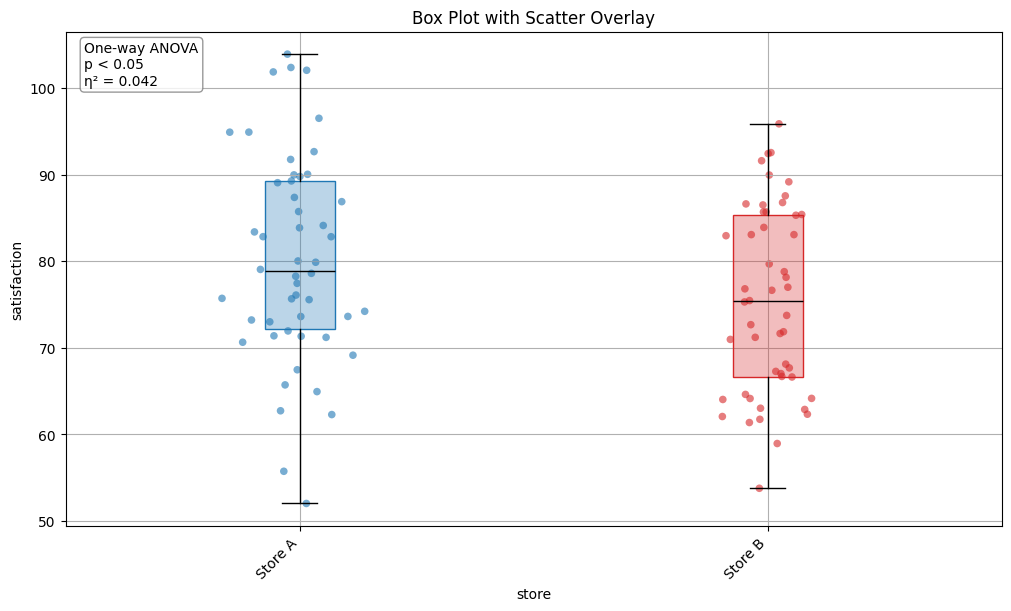

In [ ]:
fig, ax = plot_box_scatter(scenario_a, x='store', y= 'satisfaction', show_stat_test=True, palette = colors, jitter=0.05)

## Scenario 2: High Variance, Small Sample

In Scenario 2, both stores maintain the same small sample sizes but now exhibit high variance in customer satisfaction scores. This creates a dramatically different situation:
- Data points are widely scattered around each store's mean
- The difference between stores becomes difficult to distinguish from random noise
- Statistical analysis shows that any apparent difference is NOT statistically significant
- Despite identical means to Scenario 1, we cannot confidently conclude that Store A outperforms Store B

**Key insight**: High variance makes small samples unreliable for decision-making, even when means appear different.

This scenario demonstrates how the same mean difference can tell completely different stories depending on data variability. The executive summary bar chart would look identical to Scenario 1, but the underlying reality is fundamentally different - we simply don't have enough evidence to support business action.

Next, in Scenario 3, we will increase the sample size while keeping the high variance. This will add statistical power, making it easier to detect a true difference between the stores—even when the data is noisy.

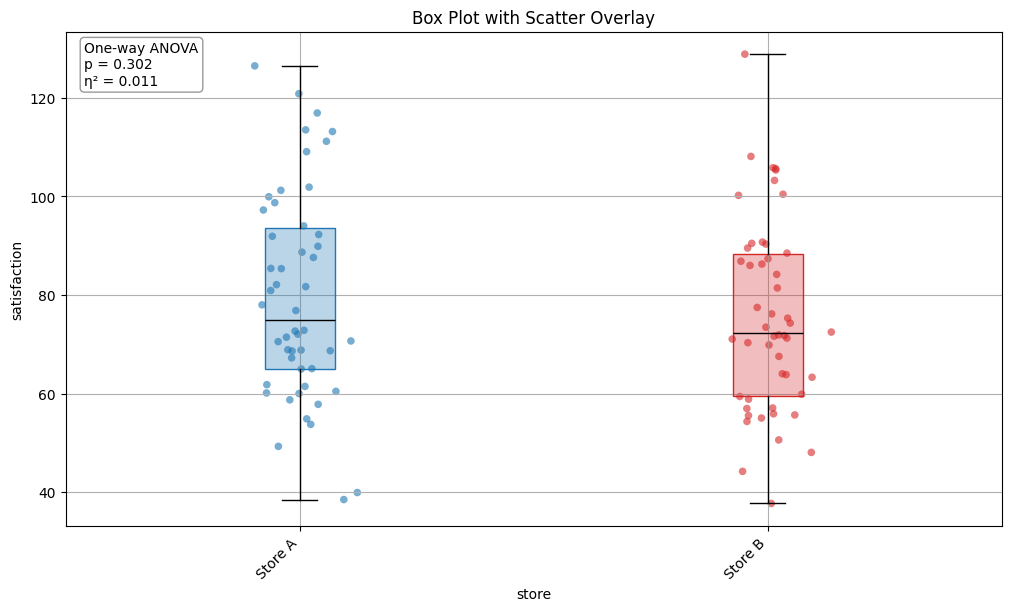

In [202]:
fig, ax = plot_box_scatter(scenario_b, x='store', y= 'satisfaction', show_stat_test=True, palette = colors, jitter=0.05)